In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('warm_start_comparison.csv')

In [45]:
df.head()

,test number,cut off,initial gap improvement ratio,cut off gap improvement ratio,warm evaluated nodes ratio,total restart evaluated nodes ratio,warm solve time ratio,total restart solve time ratio,cold objective value,cold initial lower bound,...,warm cut off lower bound,warm cut off gap,cold evaluated nodes,warm evaluated nodes,total restart evaluated nodes,cold solve time,cut off time,cglp time,warm solve time,total restart solve time
0,0,4,0.001884,0.113390,0.000000,-0.023669,-0.070858,-0.373182,-1148.0,-1188.365844,...,-1183.721328,0.031116,169,169,173,0.518361,0.032027,0.124686,0.555091,0.711804
1,0,16,0.001717,0.066091,-0.142012,-0.236686,-0.161229,-1.745820,-1148.0,-1188.365844,...,-1176.324809,0.024673,169,193,209,0.518361,0.076736,0.744654,0.601936,1.423326
2,1,4,0.074754,0.040461,0.333333,0.315556,0.262461,-0.085657,-13624.0,-13672.102346,...,-13666.705710,0.003135,225,150,154,0.473098,0.039196,0.125498,0.348928,0.513622
3,1,16,0.027357,0.027125,0.324444,0.253333,0.219701,-0.864559,-13624.0,-13672.102346,...,-13658.833792,0.002557,225,152,168,0.473098,0.077694,0.435267,0.369158,0.882119
4,2,4,0.045785,0.023623,0.175071,0.171265,0.167297,0.098094,-113.0,-136.210052,...,-134.343414,0.188880,1051,867,871,2.416528,0.046866,0.120365,2.012249,2.179480


In [46]:
cut_offs = list(df['cut off'].unique())
tests = len(df['test number'].unique())

title = {
    'initial gap improvement ratio': 'Warm Start Initial Gap Relative Improvement',
    'cut off gap improvement ratio': 'Warm Start Cut Off Gap Relative Improvement',
    'warm evaluated nodes ratio': 'Warm Start Evaluated Nodes Relative Improvement',
    'total restart evaluated nodes ratio': 'Total Restart Evaluated Nodes Relative Improvement',
    'warm solve time ratio': 'Warm Start Run Time Relative Improvement',
    'total restart solve time ratio': 'Total Restart Run Time Relative Improvement'
}

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_7965/503305200.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


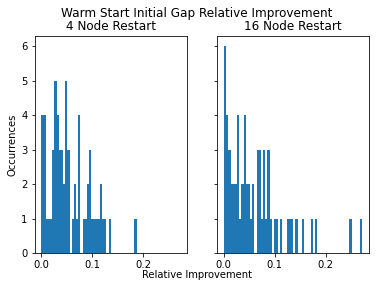

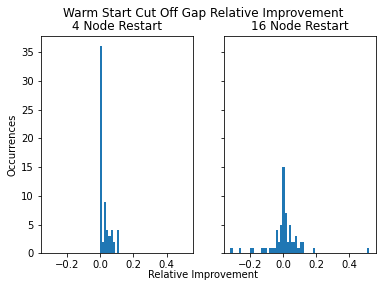

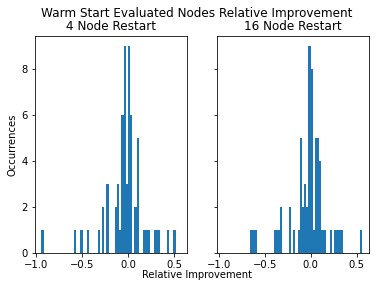

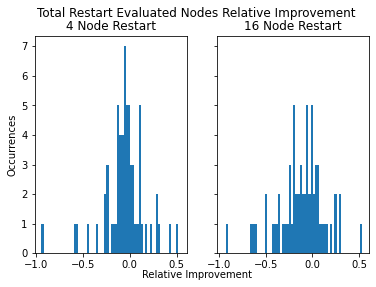

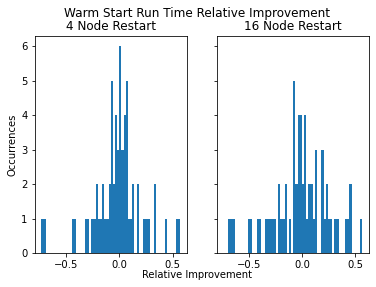

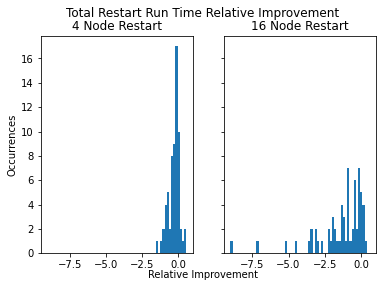

In [47]:
for metric, name in title.items():
    # make a new side by side plot for each metric
    fig, ax = plt.subplots(nrows=1, ncols=len(cut_offs), sharey=True)
    low, high =  df[metric].min(), df[metric].max()
    for i, cut_off in enumerate(cut_offs):
        # make plot
        samples = df.loc[df['cut off'] == cut_off][metric]
        ax[i].hist(samples, bins=tests, range=(low, high))

        # make it pretty
        ax[i].set_title(f"{cut_off} Node Restart")
        if i == 0:
            ax[i].set_ylabel('Occurrences')
    fig.suptitle(name)
    fig.text(0.5, 0.04, 'Relative Improvement', ha='center')
    fig.show()